## Summary stats for CO2 emissions excluding LULUCF( tons per capita)

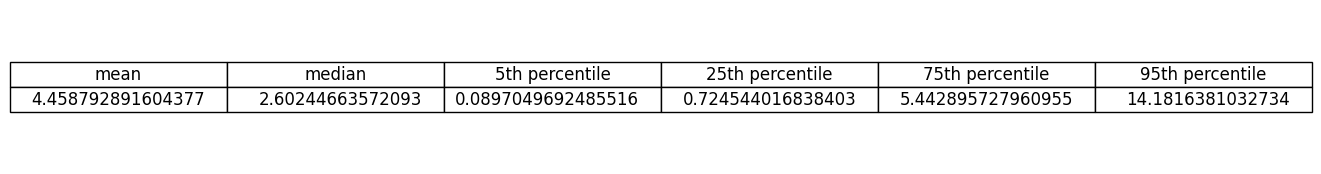

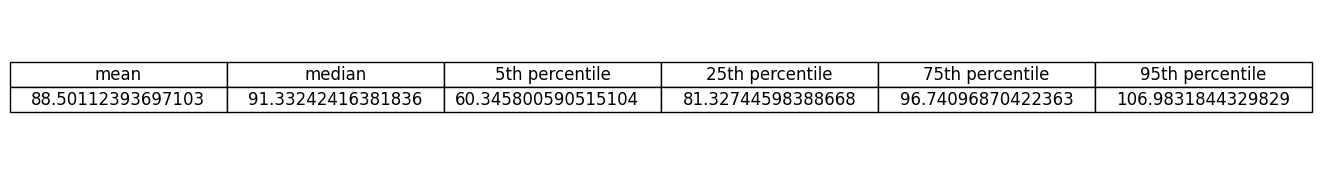

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math


def select_column_dataset(datafile,column_name,separator,rows_to_skip):
    """
   Read the datafile provided and return the values in the column column_name
    """
            
    # Read our data file as chunks
    csv_chunks = pd.read_csv(datafile, chunksize=100000, sep=separator,skiprows=rows_to_skip)
    
    #Save all chunks in an array
    all_chunks = []
    for chunk_df in csv_chunks:
        all_chunks.append(chunk_df)
        
    # Concatenate all chunks into a single DataFrame
    data = pd.concat(all_chunks)
    
    # Get the desired column

    return data.get(column_name)
    

def summary_statistics(data):
    """
    Compute and return in a dictionary : mean, median, standard deviation, 5, 25, 75, and
95 percentiles
    """
    # handle missing values in data by removing them
    data = [x for x in data if not math.isnan(x)]
    # compute mean
    mean = np.mean(data)
    # compute median
    median = np.median(data)
    # compute standard deviation
    std = np.std(data)
    # 5th percentile
    percentile5 = np.percentile(data,5)
    # 25th percentile
    percentile25 = np.percentile(data,25)
    # 75th percentile
    percentile75 = np.percentile(data,75)
    # 95th percentile
    percentile95 = np.percentile(data,95)

    return {
        'mean' : mean,
        'median' : median,
        '5th percentile' : percentile5,
        '25th percentile' : percentile25,
        '75th percentile' : percentile75,
        '95th percentile' : percentile95,
    }
    
def plot_summary_table(summary_stats):
    """
    Plot a table from the summary statistics
    """

    # Create a dataFrame with the summary statistics
    ss_df = pd.DataFrame([summary_stats])

    # Plot the tables
    fig, ax = plt.subplots(figsize=(6, 2))
    ax.axis('off')  # remove axis

    # Convert the dataFrame to matplotlib table
    table = ax.table(
        cellText=ss_df.values,       # table values
        colLabels=ss_df.columns,     # column headers
        loc='center'
    )

    # Style
    table.auto_set_font_size(False)
    table.set_fontsize(12)
    table.scale(2.8, 1.5)

    plt.show()
    
# Get the C02 emissions and the primary completion rate for all countries in 2023 
# the separator in the files is ','
# There is an inconsistency on the first 04 rows in both datafiles so we skip them
emissionsCO22023 = select_column_dataset(datafile="CO2_emissions_excluding_LULUC_( tons per capita).csv",separator=',',rows_to_skip=4,column_name='2023')
completionrate2023 = select_column_dataset(datafile="Primary_completion_rate_total_(% of relevant age group).csv",separator=',',rows_to_skip=4,column_name='2023')

# Get the summary statistics for the C02 emissions and the primary completion rate for all countries in 2023  
ss_emissionsCO22023 = summary_statistics(emissionsCO22023)
ss_completionrate2023 = summary_statistics(completionrate2023)

# Plot the 02 tables for the C02 emissions and the primary completion rate for all countries in 2023  
plot_summary_table(ss_emissionsCO22023)
plot_summary_table(ss_completionrate2023)

# GDP per capita (current US$) vs Prevalence of underweight, weight for age (% of children under 5 )

## Exploratory Data Analysis

5872 5872


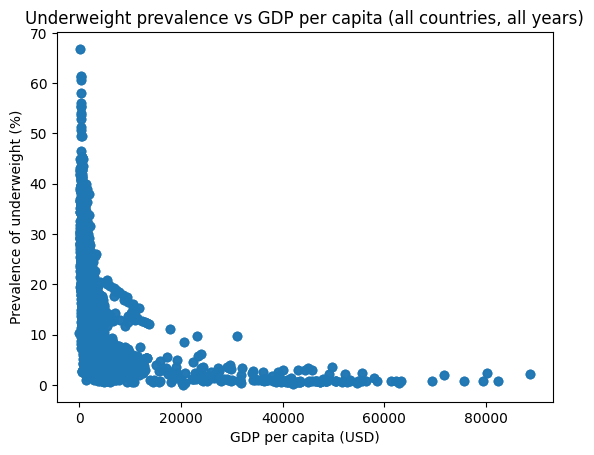

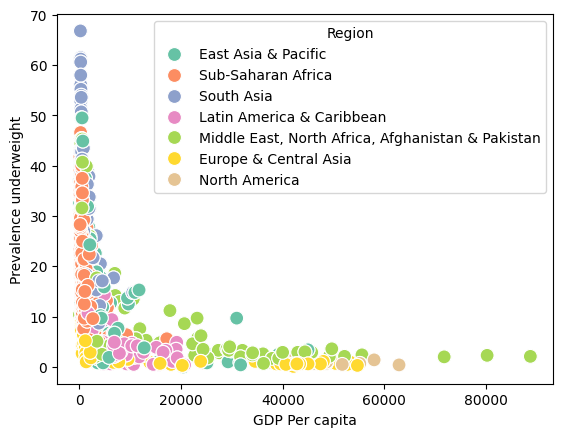

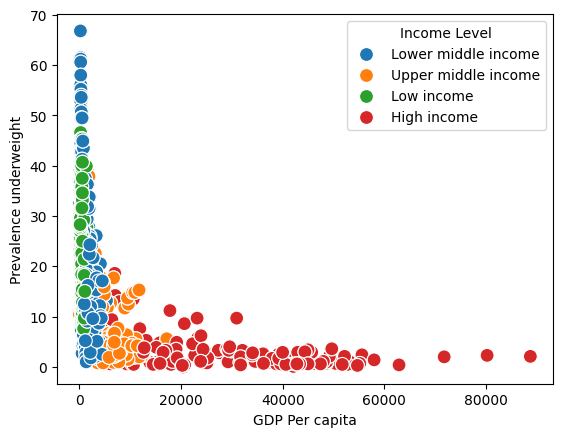

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
import seaborn as sns


def read_datafile(datafile,separator,rows_to_skip):
    """
   Read the datafile provided and return a data frame
    """
            
    # Read our data file as chunks
    csv_chunks = pd.read_csv(datafile, chunksize=100000, sep=separator,skiprows=rows_to_skip)
    
    #Save all chunks in an array
    all_chunks = []
    for chunk_df in csv_chunks:
        all_chunks.append(chunk_df)
        
    # Concatenate all chunks into a single DataFrame
    data = pd.concat(all_chunks)
    
    # Get the desired column

    return data

def get_float_country_column_value(country_name,column_name,dataframe):
    
    """
     get the float value of a column for a given country
    """

    # Get the row of the data frame where the country is the provided country_name
    country_column_matches = dataframe.loc[dataframe['Country Name'] == country_name,column_name].values
    if len(country_column_matches) > 0:
        
        # get and return the value at the column_name as a float
        value = str(country_column_matches[0])
        
        #handle missing values
        if value == 'nan':
            return -1
        return float(value)
    
    # return -1 as default
    return -1
    

def get_available_years_column(df):
    """
     Return a list of all years columns in the dataset
    """
            
    # Get all headers
    column_headers = df.columns.tolist()
    
    # Regex pattern to match a four-digit year
    year_pattern = r"\d{4}"

    
    # filter to get all years available
    years = [item for item in column_headers if re.search(year_pattern, item)]
    return years


#1 - Plot the GDP per capita against the prevalence weight in a scatter plot

# Get the GDP per capita and the prevalence weight for all countries and all available years
# the separator in the files is ','
# There is an inconsistency on the first 04 rows in both datafiles so we skip them
gdp_df = read_datafile(datafile="GDP Per capita.csv",separator=',',rows_to_skip=4)
weight_df = read_datafile(datafile="Prevalence underweight.csv",separator=',',rows_to_skip=4)

# get available years in the two datasets
available_years = np.concat([get_available_years_column(gdp_df),get_available_years_column(weight_df)])

# get available countries in the two datasets
available_countries = np.concat([gdp_df.get('Country Name'),weight_df.get('Country Name')])

# inialize final gdp and ubderweight per country and year containers
final_gdp = []
final_weight = []

# Iterate through available years
for year in available_years :
    # Iterate through available countries
    for country in available_countries :
        # add the Prevalence underweight and GDP per capita for the current year and the current country if the values are not missing
        gdp_value = get_float_country_column_value(column_name=year,country_name=country,dataframe=gdp_df)
        weight_value = get_float_country_column_value(column_name=year,country_name=country,dataframe=weight_df)
        if gdp_value != -1 and weight_value != -1: # if both are not missing
            final_gdp.append(gdp_value)
            final_weight.append(weight_value)
        
print(len(final_gdp),len(final_weight))

# Plot the scatter plot
plt.scatter(final_gdp, final_weight, alpha=0.6)
plt.xlabel("GDP per capita (USD)")
plt.ylabel("Prevalence of underweight (%)")
plt.title("Underweight prevalence vs GDP per capita (all countries, all years)")
plt.show()


#2 - Plot the GDP per capita against the prevalence weight grouping by countries in a scatter plot

# Get the metadata of the two datasets
gdp_metadata = read_datafile(datafile="Metadata_GDP Per capita_Country.csv",separator=',',rows_to_skip=0)
weight_metadata = read_datafile(datafile="Metadata_Prevalence underweight_Country.csv",separator=',',rows_to_skip=0)

#print(gdp_metadata.head())
def get_meta_country_column(country_name,column_name):
    
    """
     get the column value of a given country in the metadata as a string
    """
    
    #initialize the column value to return
    column_value = 'Not found'

    # Get the actual country code
    country_code_matches = gdp_df.loc[gdp_df['Country Name'] == country_name, "Country Code"].values
    if len(country_code_matches) > 0:
        country_code = country_code_matches[0]
        #print(f"country code of {country_name} is --{country_code}--")
        
        # Get the column value and ensure it's a string
        country_column_matches = gdp_metadata.loc[gdp_metadata['Country Code'] == country_code, column_name].values
        if len(country_column_matches) > 0:
            column_value = str(country_column_matches[0])
    
    # if the region was not found
    # Search in the prevalence underweight dataframe
    if column_value == 'Not found':
        country_code_matches = weight_df.loc[weight_df['Country Name'] == country_name, "Country Code"].values
        if len(country_code_matches) > 0:
            country_code = country_code_matches[0]
            #print(f"country code of {country_name} is --{country_code}--")
            
            # Get the region and ensure it's a string
            country_column_matches = weight_metadata.loc[weight_metadata['Country Code'] == country_code, column_name].values
            if len(country_column_matches) > 0:
                column_value = str(country_column_matches[0])
      
    if column_value == 'nan' :
        return 'Not found'
   
                
    return column_value

#initialize final region
final_regions = []

# Iterate through available years
for year in available_years :
    # Iterate through available countries
    for country in available_countries :
        # only for countries that have Prevalence underweight and GDP per capita for the current year
        gdp_value = get_float_country_column_value(column_name=year,country_name=country,dataframe=gdp_df)
        weight_value = get_float_country_column_value(column_name=year,country_name=country,dataframe=weight_df)
        if gdp_value != -1 and weight_value != -1: # if both are not missing
            # add the region of the current country
            final_regions.append(get_meta_country_column(country_name=country,column_name='Region'))

#print(final_regions)


scatter_df = pd.DataFrame({
    'GDP Per capita' : final_gdp,
    'Prevalence underweight' : final_weight,
    'Region' : final_regions
})

# filter not found region
scatter_df = scatter_df[scatter_df["Region"] != "Not found"]


# Plot the scatter plot using seaborn
sns.scatterplot(
    data=scatter_df,
    x="GDP Per capita",
    y="Prevalence underweight",
    hue="Region",        # different colors by region
    palette="Set2",      # color palette
    s=100                # marker size
)
plt.show()


#3 - Plot the GDP per capita against the prevalence weight grouping by income levels in a scatter plot



#initialize final income levels
final_income_levels = []

# Iterate through available years
for year in available_years :
    # Iterate through available countries
    for country in available_countries :
        # only for countries that have Prevalence underweight and GDP per capita for the current year
        gdp_value = get_float_country_column_value(column_name=year,country_name=country,dataframe=gdp_df)
        weight_value = get_float_country_column_value(column_name=year,country_name=country,dataframe=weight_df)
        if gdp_value != -1 and weight_value != -1: # if both are not missing
            # add the region of the current income level
            final_income_levels.append(get_meta_country_column(country_name=country,column_name='IncomeGroup'))

#print(final_regions)


scatter_df_income = pd.DataFrame({
    'GDP Per capita' : final_gdp,
    'Prevalence underweight' : final_weight,
    'Income Level' : final_income_levels
})


# filter not found income levels
scatter_df_income = scatter_df_income[scatter_df_income["Income Level"] != "Not found"]


# Plot the scatter plot using seaborn
sns.scatterplot(
    data=scatter_df_income,
    x="GDP Per capita",
    y="Prevalence underweight",
    hue="Income Level",        # different colors by income level
    palette="tab10",      #color palette
    s=100                # marker size
)
plt.show()



## Time series and daily returns analysis (12/31/2013 – 08/31/2015)


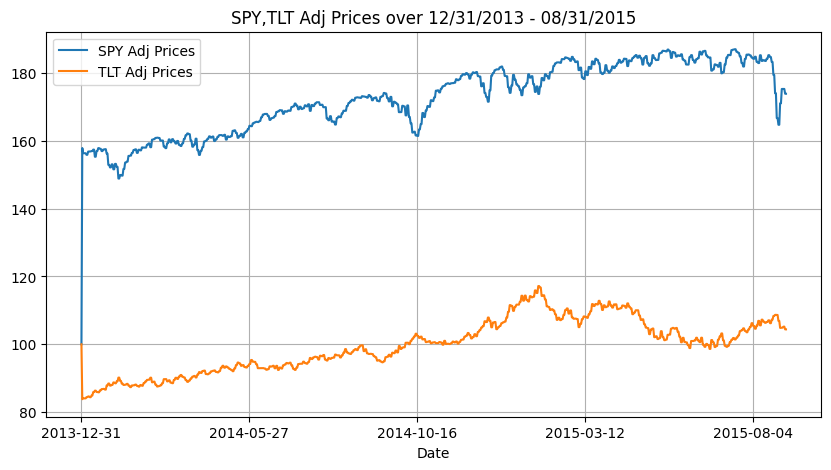

SPY Daily return : 

Average : 0.08206816486481053
Min : -4.210697162689259
Max : 57.85363799999998
TLT Daily return : 

Average : 0.008661628020499234
Min : -16.185417
Max : 2.6468904269034477


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


def read_datafile(datafile,separator,rows_to_skip):
    """
   Read the datafile provided and return a data frame
    """
            
    # Read our data file as chunks
    csv_chunks = pd.read_csv(datafile, chunksize=100000, sep=separator,skiprows=rows_to_skip)
    
    #Save all chunks in an array
    all_chunks = []
    for chunk_df in csv_chunks:
        all_chunks.append(chunk_df)
        
    # Concatenate all chunks into a single DataFrame
    data = pd.concat(all_chunks)
    
    # Get the desired column

    return data



# Extract the two datafile in dataframes
spy_df = read_datafile(datafile="SPY.csv",separator=',',rows_to_skip=0)
tlt_df = read_datafile(datafile="TLT.csv",separator=',',rows_to_skip=0)

# Select the adjusted closing prices and dates between 12/31/2013 – 08/31/2015
spy_adj_prices = spy_df.loc[(spy_df['Date'] >= '2013-12-31') & (spy_df['Date'] <= '2015-08-31'),['Adj Close','Date']]
tlt_adj_prices = tlt_df.loc[(tlt_df['Date'] >= '2013-12-31') & (tlt_df['Date'] <= '2015-08-31'),['Adj Close','Date']]

#extract and concatenate dates
final_dates = np.concat([spy_adj_prices.get('Date'),tlt_adj_prices.get('Date')])

# Normalize the prices
final_spy_prices = []
final_tlt_prices = []

i = 0 #index
for date in final_dates:
    # Get the values of adjusted prices for the current date for SPY
    spy_date_matches_prices = spy_adj_prices.loc[spy_adj_prices["Date"] == date,"Adj Close"].values
    # Get the values of adjusted prices for the current date for TLT
    tlt_date_matches_prices = tlt_adj_prices.loc[tlt_adj_prices["Date"] == date,"Adj Close"].values
    
    
    if len(spy_date_matches_prices) > 0 and len(tlt_date_matches_prices) > 0:
        final_spy_prices.append(spy_date_matches_prices[0])
        final_tlt_prices.append(tlt_date_matches_prices[0])
        
        #normalize by the first price (current / first) * 100
        final_spy_prices[i] = final_spy_prices[i] * 100 / final_spy_prices[0]
        final_tlt_prices[i] = final_tlt_prices[i] * 100 / final_tlt_prices[0]
        
        i+=1 #increment
    
    
# Plot the time series for both TLt abd SPY
time_series_df = pd.DataFrame({
    'Date' : final_dates,
    'SPY Adj Prices' : final_spy_prices,
    'TLT Adj Prices' : final_tlt_prices
})

# Sort by Date
time_series_df = time_series_df.sort_values(by='Date')

time_series_df.plot(x="Date", y=["SPY Adj Prices", "TLT Adj Prices"], figsize=(10,5))
plt.title("SPY,TLT Adj Prices over 12/31/2013 - 08/31/2015")
plt.grid(True)
plt.show()



# Daily returns for SPY and TLT
spy_daily_return = time_series_df["SPY Adj Prices"].pct_change()
tlt_daily_return = time_series_df["TLT Adj Prices"].pct_change()

#Calculate the average, min, and max daily return for SPY and TLT (in %)
average_spy_daily_return = spy_daily_return.mean() * 100 # SPY Daily return : 

min_spy_daily_return = spy_daily_return.min() * 100
max_spy_daily_return = spy_daily_return.max() * 100

average_tlt_daily_return = tlt_daily_return.mean() * 100
min_tlt_daily_return = tlt_daily_return.min() * 100
max_tlt_daily_return = tlt_daily_return.max() * 100

print(f"SPY Daily return : \n\nAverage : {average_spy_daily_return}\nMin : {min_spy_daily_return}\nMax : {max_spy_daily_return}")
print(f"TLT Daily return : \n\nAverage : {average_tlt_daily_return}\nMin : {min_tlt_daily_return}\nMax : {max_tlt_daily_return}")



## Fertility rate, total (births per woman) versus GDP per capita PPP (current international $)

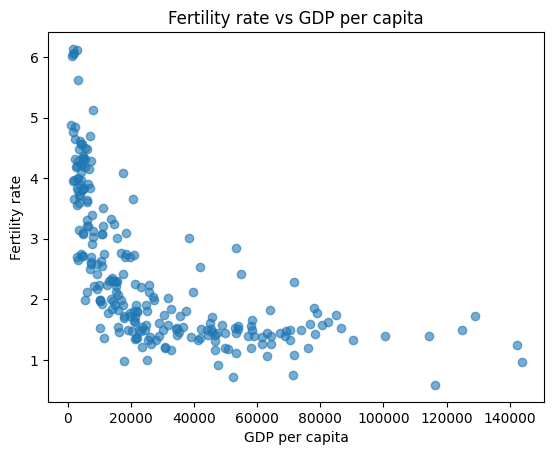

Correlation coefficent between GDP and Fertility rate : -0.6188248795954208


In [5]:
import pandas as pd
import matplotlib.pyplot as plt


def read_datafile(datafile,separator,rows_to_skip):
    """
   Read the datafile provided and return a data frame
    """
            
    # Read our data file as chunks
    csv_chunks = pd.read_csv(datafile, chunksize=100000, sep=separator,skiprows=rows_to_skip)
    
    #Save all chunks in an array
    all_chunks = []
    for chunk_df in csv_chunks:
        all_chunks.append(chunk_df)
        
    # Concatenate all chunks into a single DataFrame
    data = pd.concat(all_chunks)
    
    # Get the desired column

    return data



# Extract the two datafile in dataframes
# No need for the 04 first rows
gdp_df = read_datafile(datafile="GDP per capita, PPP (current international $).csv",separator=',',rows_to_skip=4)
fertility_df = read_datafile(datafile="Fertility rate, total (births per woman).csv",separator=',',rows_to_skip=4)

# Select the 2023 data
gdp_2023 = gdp_df['2023']
fertility_2023 = fertility_df['2023']

# Plot the scatter plot
plt.scatter(gdp_2023, fertility_2023, alpha=0.6)
plt.xlabel("GDP per capita")
plt.ylabel("Fertility rate")
plt.title("Fertility rate vs GDP per capita")
plt.show()


# Compute the Correlation coefficient
corr = gdp_2023.corr(fertility_2023)
print(f"Correlation coefficent between GDP and Fertility rate : {corr}")



## Happy Planet Index against Corruption Perceptions Index ($)

/home/alberic/Documents/Python/Vanilla/myenv/lib/python3.12/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)
/tmp/ipykernel_600129/3708888252.py:93: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(bbox_to_anchor=(2.75, 1.15), loc='upper left')  # legend outside


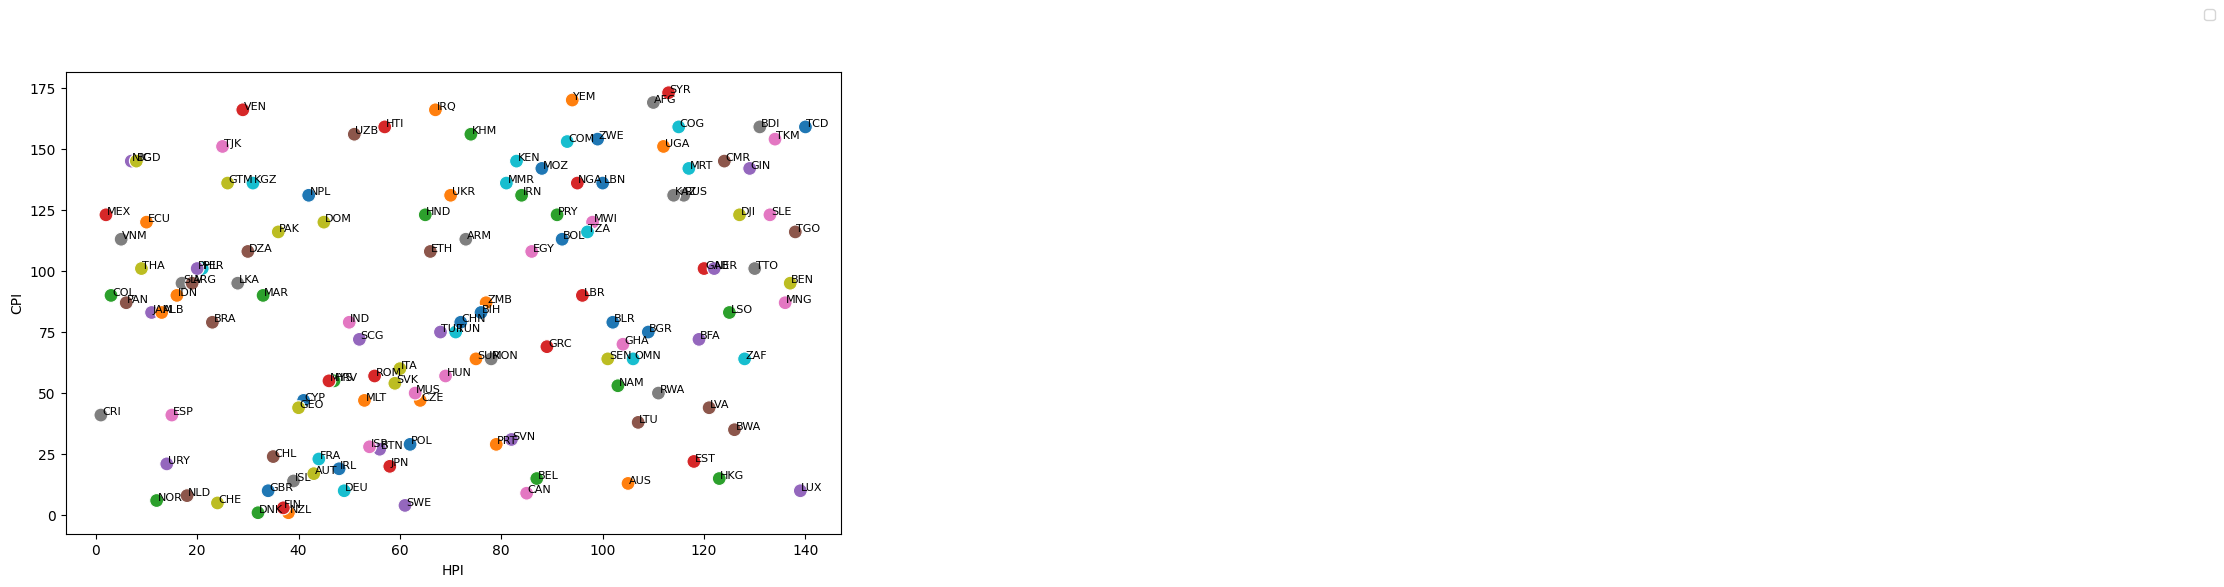

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime


# Extract the two datafile
cpi_data = pd.ExcelFile("DataSets/CPI2016_Results.xlsx")
hpi_data = pd.ExcelFile("DataSets/hpi-data-2016.xlsx")

# Parse the sheets we are interested in to get the data
cpi_df = cpi_data.parse('CPI 2015-2016')

# Set the header to the row 6 but index 5
hpi_df = hpi_data.parse('Complete HPI data',header=5)

def get_index_level(index_type,country):
    """
     Return a level HIGH, LOW, MEDIUM of an index type (CPI or HPI)
     based on the rank
    """
    
    # initialize ranks with CPI ranks
    ranks = cpi_df['CPI 2016 Rank']
    # get country rank
    country_rank = cpi_df.loc[cpi_df['Country'] == country, "CPI 2016 Rank"].values[0]
    
    if index_type == 'hpi' : # set hpi ranks if it's hpi
        ranks = hpi_df['HPI Rank']
        # get country rank
        country_rank = hpi_df.loc[hpi_df['Country'] == country, "HPI Rank"].values[0]
            
    last_rank = ranks.max() # get the last rank
    #Compute the level percentage respective to the last rank
    level_percentage = (country_rank/last_rank) * 100
    
    # LOW level if less than 40%
    # ranked among the first for HPI means HIGH level but for CPI means LOW level
    if level_percentage < 40 :
        return "HIGH" if index_type == "hpi" else "LOW"
    
    # MEDIUM level if less than 70%
    # because ranked in the middle
    if level_percentage < 70 :
        return "MEDIUM"
    
    # HIGH level if greater than 70%
    # ranked among the last for HPI means LOW level but for CPI means HIGH level
    return "LOW" if index_type == "hpi" else "HIGH"



#initlalize final data
final_hpi = []
final_cpi = []
countries = []
index_levels = [] # level of cpi and hpi (LOW,MEDIUM,HIGH) based on the index values

for index, row in cpi_df.iterrows():
    country = row['Country']
    cpi_rank = row['CPI 2016 Rank']
    
    # Find matching country in hpi_df
    hpi_row = hpi_df[hpi_df['Country'] == country]
    if not hpi_row.empty: # add ranks and corresponding country
        hpi_rank = hpi_row.iloc[0]['HPI Rank']
        final_hpi.append(hpi_rank)
        final_cpi.append(cpi_rank)
        countries.append(row['WB Code'])



# Create a dataFrame for the scatter plot
scatter_df = pd.DataFrame({
    'HPI' : final_hpi,
    'CPI' : final_cpi,
    'Country': countries,
})

# Plot the scatter plot using seaborn
plt.figure(figsize=(10, 6))
ax = sns.scatterplot(
    data=scatter_df,
    x="HPI",
    y="CPI",
    hue="Country",        # different colors by country
    palette="tab10",      # color palette
    s=100,                # marker size
    legend=False
)

plt.legend(bbox_to_anchor=(2.75, 1.15), loc='upper left')  # legend outside


# annotate every point with country name
for i, row in scatter_df.iterrows():
    ax.text(row["HPI"] + 0.2,   # little offset to avoid overlap
            row["CPI"] + 0.2,
            row["Country"],
            fontsize=8)

plt.show()
